In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print(f"train: max {np.max(x_train)} - min {np.min(x_train)}")
print(f"train: max {np.max(x_test)} - min {np.min(x_test)}")

train: max 1.0 - min 0.0
train: max 1.0 - min 0.0


In [3]:
x_train = np.expand_dims(x_train, -1)
x_train.shape

(60000, 28, 28, 1)

In [4]:
x_test = np.expand_dims(x_test, -1)
x_test.shape

(10000, 28, 28, 1)

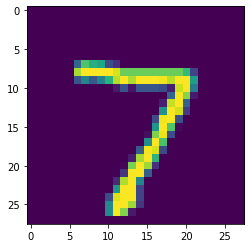

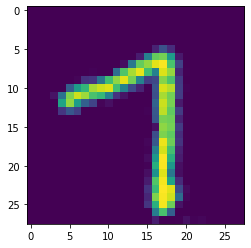

In [8]:
from tensorflow.keras.layers import RandomRotation, Input
from tensorflow.keras.models import Sequential

aug = Sequential([RandomRotation(0.1)])

img = x_test[0]

import matplotlib.pyplot as plt

plt.imshow(img[:, :, 0])
plt.show()

img = aug(img)

plt.imshow(img[:, :, 0])
plt.show()

In [50]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Input, Activation, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Model

aug = Sequential([RandomRotation(0.1)])

inputs = Input(shape=x_train.shape[1:])
x = aug(inputs)
x = Conv2D(32, 3, name="first_conv")(inputs)
x = BatchNormalization()(x)
x = Activation("relu", name="first_relu")(x)

x = Conv2D(64, 3, name="second_conv")(x)
x = BatchNormalization()(x)
x = Activation("relu", name="second_activation")(x)

x = Conv2D(128, 3, name="third_conv")(x)
x = BatchNormalization()(x)
x = Activation("relu", name="third_activation")(x)

x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="cnn.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [52]:
res = model.fit(x_train,
                y_train,
                epochs=10,
                callbacks=callbacks,
                validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 12s 8ms/step - loss: 0.3677 - accuracy: 0.9396 - val_loss: 0.1416 - val_accuracy: 0.9734
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1078 - accuracy: 0.9749 - val_loss: 0.1126 - val_accuracy: 0.9737
Epoch 3/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0705 - accuracy: 0.9818 - val_loss: 0.0612 - val_accuracy: 0.9837
Epoch 4/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0547 - accuracy: 0.9852 - val_loss: 0.0663 - val_accuracy: 0.9828
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0484 - accuracy: 0.9860 - val_loss: 0.0651 - val_accuracy: 0.9834
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.0449 - val_accuracy: 0.9871
Epoch 7/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0450 - val_ac

In [53]:
from tensorflow.keras.models import load_model

model = load_model("cnn.keras")
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9884


[0.03338874131441116, 0.9883999824523926]

In [36]:
a_layers = []
c_layers = []

for layer in model.layers:
    if isinstance(layer, Activation):
        a_layers.append(layer.output)
    if isinstance(layer, Conv2D):
        c_layers.append(layer.output)
conv_model = Model(inputs=model.input, outputs=c_layers)
act_model = Model(inputs=model.input, outputs=a_layers)

In [37]:
img = x_test[0]
img = np.expand_dims(img, axis=0)
conv_activations = conv_model(img)

In [38]:
conv_activations[0].shape

TensorShape([1, 26, 26, 32])

In [39]:
first_layer_activation = conv_activations[0]

In [40]:
first_layer_activation.shape

TensorShape([1, 26, 26, 32])

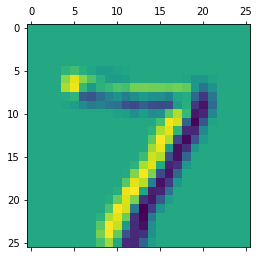

In [41]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap="viridis")
plt.show()

In [42]:
len(conv_activations)

3

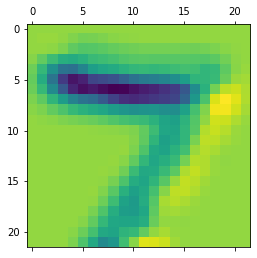

In [43]:
last_conv_activations = conv_activations[2]
plt.matshow(last_conv_activations[0, :, :, 32], cmap="viridis")
plt.show()